In [7]:
import pandas as pd
import plotly as pt
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df_treatments = pd.read_parquet('../data/treatments_2017-2020_preprocessed.parquet')

In [212]:
df_treatments.shape

(3638892, 83)

## Deaths by year 

<Axes: xlabel='Year', ylabel='No of deaths'>

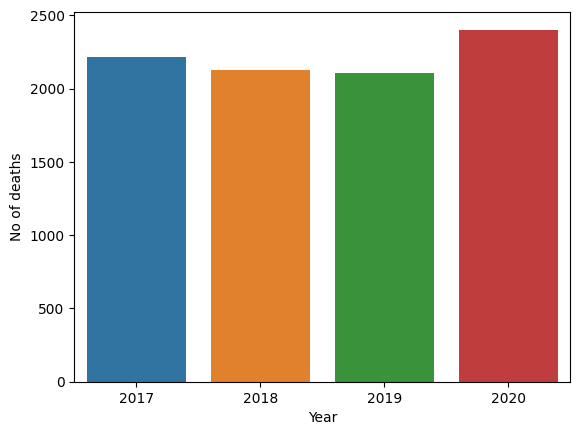

In [213]:
df_deaths = df_treatments[df_treatments["REASON"] == 6]
df_deaths_count = df_deaths.groupby("DISYR")["REASON"].count().reset_index()
df_deaths_count.rename(
    columns={"DISYR": "Year", "REASON": "No of deaths"}, inplace=True
)
sns.barplot(data=df_deaths_count, x="Year", y="No of deaths")

### % of people facing death among recurring and non-recurring patients

In [214]:
num_admitted_more_than_once, num_admitted_once = (
    df_treatments["NOPRIOR"].value_counts().values
)

death_of_num_admitted_more_than_once, death_of_num_admitted_once = (
    df_treatments[df_treatments["REASON"] == 6]["NOPRIOR"].value_counts().values
)

In [215]:
print('Proportion of peple dead among repeating patients : {}'.format(death_of_num_admitted_more_than_once/num_admitted_more_than_once * 100))

print('Proportion of peple dead among non-repeating patients : {}'.format(death_of_num_admitted_once/num_admitted_once * 100))

Proportion of peple dead among repeating patients : 0.28535558711474646
Proportion of peple dead among non-repeating patients : 0.16742570436125048


# Repeat admissions with different demographics

In [216]:
df_repeat_admit = df_treatments[  df_treatments['NOPRIOR'] == 1  ]
df_repeat_admit.head(2)

,REASON,FRSTUSE2,EMPLOY_D,MARSTAT,PRIMINC,TRNQFLG,NOPRIOR,PREG,METHUSE,FRSTUSE3,...,FREQ3,CASEID,OTHERFLG,cbsatitle,metropolitanmicropolitanstatis,countycountyequivalent,statename,fipscountycode,centraloutlyingcounty,NUM_SUBS
1,4,6,4,None,None,0,1,Pregnant,1,-9,...,-9,20171390962,0,"Chico, CA",Metropolitan Statistical Area,Butte County,California,7,Central,Two sub
2,3,5,3,Never married,Public assistance,0,1,Pregnant,1,-9,...,-9,20171519498,0,"Anchorage, AK",Metropolitan Statistical Area,"Matanuska-Susitna Borough, Anchorage Municipality",Alaska,"170, 20","Central, Outlying",Two sub


### 1. Age 

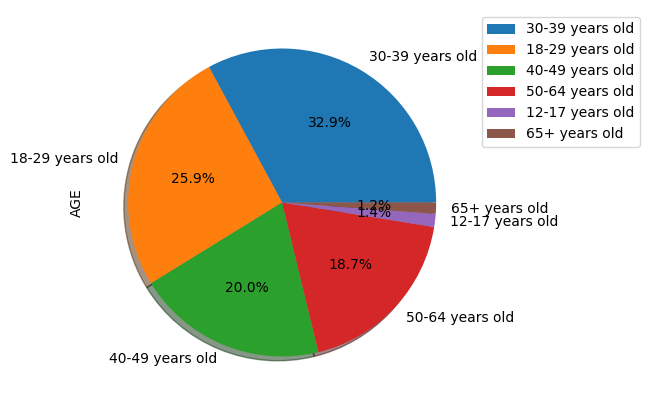

In [217]:
df_temp = df_repeat_admit[['AGE']].apply(pd.Series.value_counts)
plot = df_temp.plot.pie(y='AGE', figsize=(5, 5),autopct='%1.1f%%', \
                   shadow=True, startangle=0)
plt.legend(bbox_to_anchor=(1.0, 1.0))


### 2. Gender

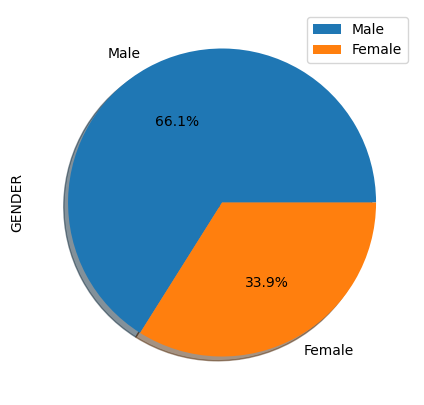

In [218]:
df_temp = df_repeat_admit[['GENDER']].apply(pd.Series.value_counts)
plot = df_temp.plot.pie(y='GENDER', figsize=(5, 5),autopct='%1.1f%%', \
                   shadow=True, startangle=0)

### 3. Race

Text(0, 0.5, '% of client population')

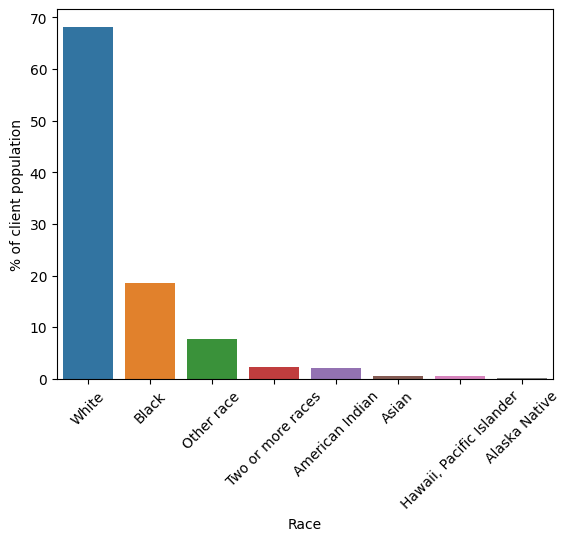

In [219]:
df_temp = df_repeat_admit[['RACE']].apply(pd.Series.value_counts).reset_index()
df_temp['RACE'] = df_temp['RACE']/df_temp['RACE'].sum()   * 100
plot = sns.barplot(data=df_temp, x="index", y="RACE", errorbar='sd')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45);
plt.xlabel('Race');
plt.ylabel('% of client population')


### 4. Division

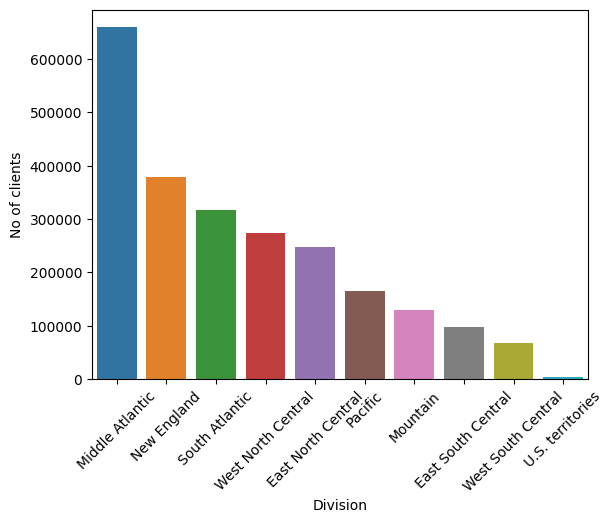

In [220]:
df_temp = df_repeat_admit['DIVISION'].value_counts().reset_index()
df_temp.rename(columns={"index": "Division", "DIVISION": "No of clients"},inplace=True)
sns.barplot(data=df_temp, x="Division", y="No of clients", errorbar='sd')
plt.xticks(rotation=45);

### 5. Education

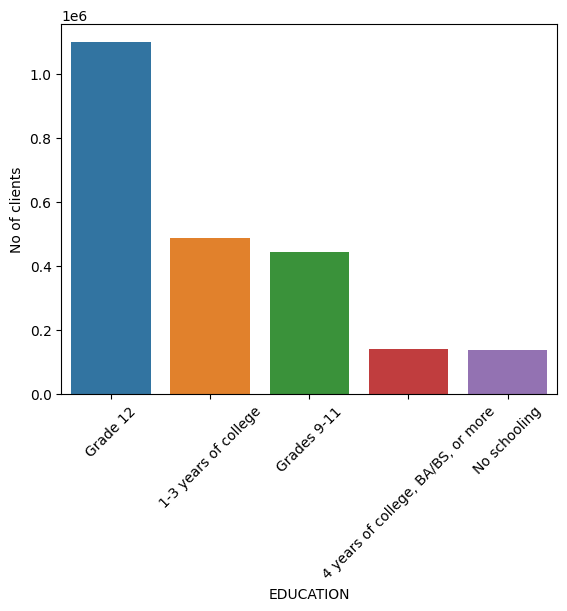

In [221]:
df_temp = df_repeat_admit['EDUC'].value_counts().reset_index()
df_temp.rename(columns={"index": "EDUCATION", "EDUC": "No of clients"},inplace=True)
sns.barplot(data=df_temp, x="EDUCATION", y="No of clients", errorbar='sd')
plt.xticks(rotation=45);

### 6. Employment status

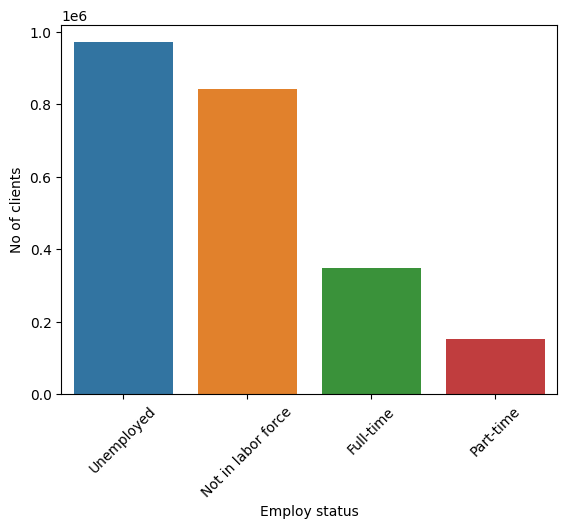

In [222]:
df_temp = df_repeat_admit['EMPLOY'].value_counts().reset_index()
df_temp.rename(columns={"index": "Employ status", "EMPLOY": "No of clients"},inplace=True)
sns.barplot(data=df_temp, x="Employ status", y="No of clients", errorbar='sd')
plt.xticks(rotation=45);

### 7. Marital Status

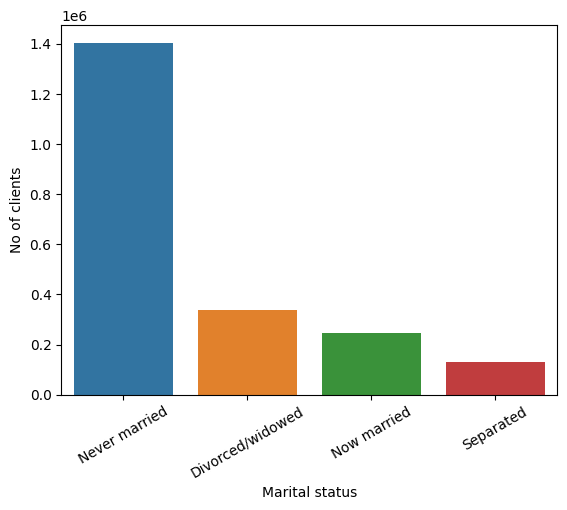

In [223]:
df_temp = df_repeat_admit['MARSTAT'].value_counts().reset_index()
df_temp.rename(columns={"index": "Marital status", "MARSTAT": "No of clients"},inplace=True)
sns.barplot(data=df_temp, x="Marital status", y="No of clients", errorbar='sd')
plt.xticks(rotation=30);

In [154]:
df_treatments.columns

Index(['REASON', 'FRSTUSE2', 'EMPLOY_D', 'MARSTAT', 'PRIMINC', 'TRNQFLG',
       'NOPRIOR', 'PREG', 'METHUSE', 'FRSTUSE3', 'DETNLF_D', 'FREQ2', 'SUB2',
       'INHFLG', 'SUB1_D', 'ALCDRUG', 'SERVICES', 'AGE', 'ETHNIC',
       'SERVICES_D', 'DETNLF', 'PRIMPAY', 'HERFLG', 'IDU', 'REGION', 'LOS',
       'FREQ_ATND_SELF_HELP_D', 'SEDHPFLG', 'SUB3', 'BENZFLG', 'OPSYNFLG',
       'FREQ3_D', 'ALCFLG', 'SUB2_D', 'OTCFLG', 'HLTHINS', 'DIVISION',
       'GENDER', 'STFIPS', 'ROUTE3', 'FRSTUSE1', 'AMPHFLG', 'PCPFLG',
       'PSOURCE', 'COKEFLG', 'MTHAMFLG', 'SUB3_D', 'DAYWAIT', 'CBSA',
       'PSYPROB', 'RACE', 'ROUTE1', 'DETCRIM', 'VET', 'ARRESTS_D', 'MARFLG',
       'FREQ1_D', 'STIMFLG', 'LIVARAG_D', 'FREQ1', 'SUB1', 'DISYR', 'BARBFLG',
       'EMPLOY', 'LIVARAG', 'FREQ2_D', 'HALLFLG', 'ROUTE2', 'ARRESTS',
       'FREQ_ATND_SELF_HELP', 'EDUC', 'DSMCRIT', 'METHFLG', 'FREQ3', 'CASEID',
       'OTHERFLG', 'cbsatitle', 'metropolitanmicropolitanstatis',
       'countycountyequivalent', 'statename', '

# Readmissions by Substances

In [155]:
df_repeat_admit = df_treatments[  df_treatments['NOPRIOR'] == 1  ]
df_repeat_admit.head(2)

,REASON,FRSTUSE2,EMPLOY_D,MARSTAT,PRIMINC,TRNQFLG,NOPRIOR,PREG,METHUSE,FRSTUSE3,...,FREQ3,CASEID,OTHERFLG,cbsatitle,metropolitanmicropolitanstatis,countycountyequivalent,statename,fipscountycode,centraloutlyingcounty,NUM_SUBS
1,4,6,4,None,None,0,1,Pregnant,1,-9,...,-9,20171390962,0,"Chico, CA",Metropolitan Statistical Area,Butte County,California,7,Central,Two sub
2,3,5,3,Never married,Public assistance,0,1,Pregnant,1,-9,...,-9,20171519498,0,"Anchorage, AK",Metropolitan Statistical Area,"Matanuska-Susitna Borough, Anchorage Municipality",Alaska,"170, 20","Central, Outlying",Two sub


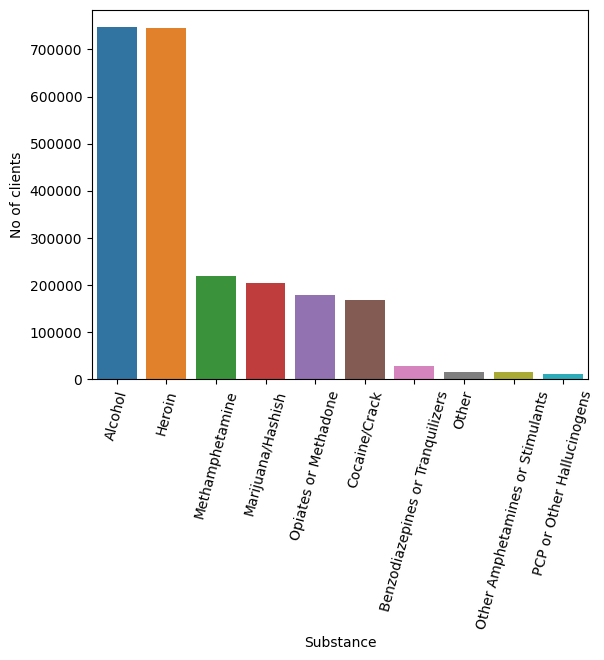

In [164]:
df_temp = df_repeat_admit['SUB1'].value_counts().reset_index()
df_temp.rename(columns={"index": "Substance", "SUB1": "No of clients"},inplace=True)
sns.barplot(data=df_temp, x="Substance", y="No of clients", errorbar='sd')
plt.xticks(rotation=75);

# Readmissions by primary source of income

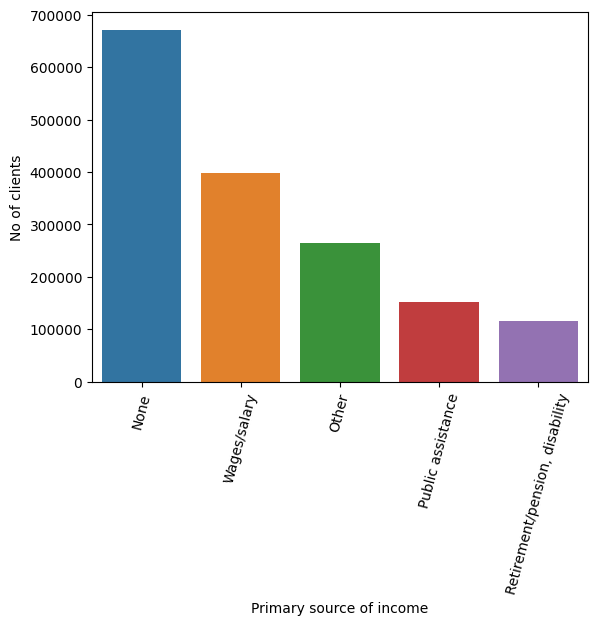

In [167]:
df_temp = df_repeat_admit['PRIMINC'].value_counts().reset_index()
df_temp.rename(columns={"index": "Primary source of income", "PRIMINC": "No of clients"},inplace=True)
sns.barplot(data=df_temp, x="Primary source of income", y="No of clients", errorbar='sd')
plt.xticks(rotation=75);

# Readmissions by Age of first use of any substance

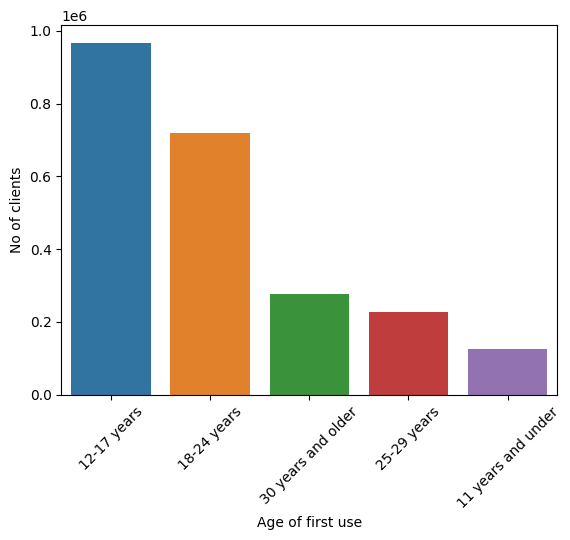

In [173]:
df_temp = df_repeat_admit['FRSTUSE1'].value_counts().reset_index()
df_temp.rename(columns={"index": "Age of first use", "FRSTUSE1": "No of clients"},inplace=True)
sns.barplot(data=df_temp, x="Age of first use", y="No of clients", errorbar='sd')
plt.xticks(rotation=45);

## Treatment completion rate substance wise

In [62]:
df_treatments = pd.read_parquet('../data/treatments_2017-2020.parquet')

In [63]:
test = df_treatments[df_treatments['REASON'] == 1].groupby('SUB1')['REASON'].count().reset_index()
test.rename(columns={"index": "Primary source of income", "REASON": "No of clients"},inplace=True)
test['No of clients'] = test['No of clients']/test['No of clients'].sum()

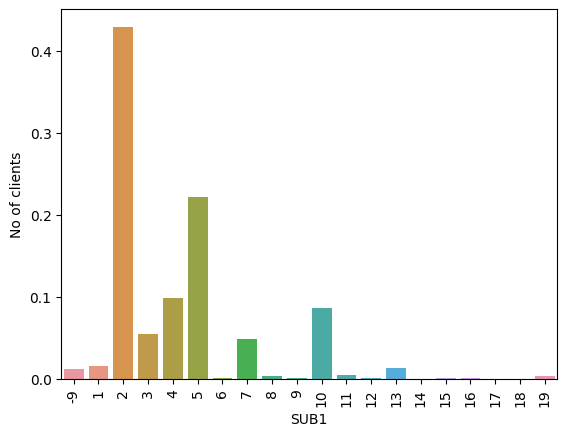

In [64]:
sns.barplot(test, x='SUB1', y='No of clients')
plt.xticks(rotation=90);

In [66]:
## LOS substance wise

In [67]:
test1 = df_treatments[df_treatments['REASON'] == 1].groupby('SUB1')['LOS'].mean().reset_index()
test1.rename(columns={"SUB1": "SUB1", "LOS": "Average no of days"},inplace=True)

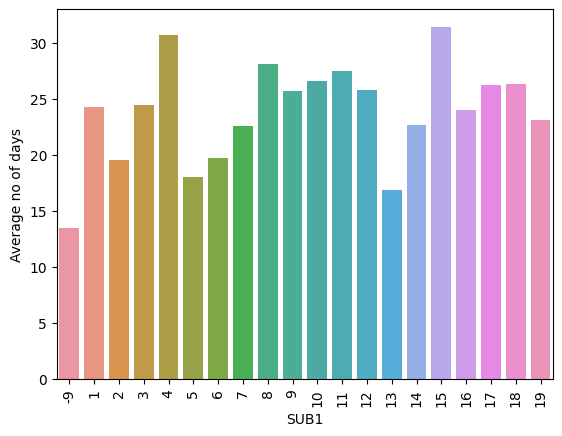

In [68]:
sns.barplot(test1, x='SUB1', y='Average no of days')
plt.xticks(rotation=90);

In [61]:
pd.concat([test,test1],axis=1)

,SUB1,Average no of days,SUB1,Average no of days
0,-9,13.516865,-9,13.516865
1,1,24.310281,1,24.310281
2,2,19.563759,2,19.563759
3,3,24.452443,3,24.452443
4,4,30.719660,4,30.719660
5,5,18.013249,5,18.013249
6,6,19.724939,6,19.724939
7,7,22.635508,7,22.635508
8,8,28.168101,8,28.168101
9,9,25.735839,9,25.735839


In [65]:
pd.concat

,SUB1,No of clients
0,-9,0.012134
1,1,0.015467
2,2,0.429546
3,3,0.055260
4,4,0.099356
5,5,0.221993
6,6,0.001277
7,7,0.048668
8,8,0.003233
9,9,0.001168


In [69]:
test1

,SUB1,Average no of days
0,-9,13.516865
1,1,24.310281
2,2,19.563759
3,3,24.452443
4,4,30.719660
5,5,18.013249
6,6,19.724939
7,7,22.635508
8,8,28.168101
9,9,25.735839


In [71]:
new = pd.concat([test,test1],axis=1)

In [74]:
new['No of clients'] - new['Average no of day']

KeyError: 'Average no of day'

In [75]:
new['Average no of days']

0     13.516865
1     24.310281
2     19.563759
3     24.452443
4     30.719660
5     18.013249
6     19.724939
7     22.635508
8     28.168101
9     25.735839
10    26.661652
11    27.492181
12    25.817656
13    16.925809
14    22.714286
15    31.450972
16    24.039375
17    26.310448
18    26.312757
19    23.144231
Name: Average no of days, dtype: float64

In [76]:
new['No of clients']

0     0.012134
1     0.015467
2     0.429546
3     0.055260
4     0.099356
5     0.221993
6     0.001277
7     0.048668
8     0.003233
9     0.001168
10    0.086309
11    0.004586
12    0.000854
13    0.013717
14    0.000065
15    0.001368
16    0.001068
17    0.000414
18    0.000300
19    0.003215
Name: No of clients, dtype: float64

In [82]:
(new['Average no of days'] - new['No of clients'])

0     13.504731
1     24.294815
2     19.134213
3     24.397183
4     30.620304
5     17.791256
6     19.723663
7     22.586840
8     28.164868
9     25.734671
10    26.575343
11    27.487595
12    25.816801
13    16.912092
14    22.714221
15    31.449603
16    24.038307
17    26.310034
18    26.312457
19    23.141016
dtype: float64

In [81]:
new

,SUB1,No of clients,SUB1,Average no of days
0,-9,0.012134,-9,13.516865
1,1,0.015467,1,24.310281
2,2,0.429546,2,19.563759
3,3,0.055260,3,24.452443
4,4,0.099356,4,30.719660
5,5,0.221993,5,18.013249
6,6,0.001277,6,19.724939
7,7,0.048668,7,22.635508
8,8,0.003233,8,28.168101
9,9,0.001168,9,25.735839
